In [1]:
import pandas as pd
import numpy as np
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    
    for sim in range(1, n_simulations + 1):
        data = df[df['sim'] == sim]['condition'].values
        for t in range(len(data)):
            u, counts = np.unique(data[:t + 1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    probs = boo.sum(axis=0) / n_simulations
    return probs


best_conditions = ['MTBD+tBuXPhos', 'MTBD+tBuBrettPhos', 'MTBD+AdBrettPhos']

algos=['Random','Exploit','EpsilonGreedy','ETC','ThompsonSamplingBeta','Pursuit', 'ThompsonSamplingGaussian','UCB1', 'BayesUCBBeta','BayesUCBGaussian' ]
path=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\MAB'
cns=[]
for algo in algos:
    fp = path+f'\{algo}.csv'
    probs = get_accuracy_bandit_model(fp, best_conditions)
    cns.append(probs)
    print(f"Accuracy for {algo}: {probs}")
    

Accuracy for Random: [0.264 0.26  0.254 0.242 0.252 0.24  0.25  0.234 0.236 0.242 0.236 0.236
 0.26  0.238 0.252 0.24  0.23  0.248 0.234 0.248 0.236 0.222 0.238 0.238
 0.226 0.222 0.216 0.21  0.21  0.23  0.228 0.224 0.242 0.234 0.238 0.25
 0.234 0.224 0.234 0.24  0.238 0.24  0.228 0.234 0.226 0.246 0.23  0.24
 0.234 0.24 ]
Accuracy for Exploit: [0.266 0.272 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274
 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274
 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274
 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274 0.274
 0.274 0.274]
Accuracy for EpsilonGreedy: [0.25  0.26  0.254 0.264 0.274 0.292 0.29  0.302 0.304 0.308 0.308 0.314
 0.314 0.322 0.326 0.326 0.332 0.336 0.34  0.344 0.35  0.35  0.354 0.354
 0.358 0.362 0.364 0.366 0.368 0.368 0.376 0.374 0.376 0.378 0.384 0.386
 0.386 0.39  0.396 0.4   0.406 0.41  0.41  0.412 0.422 0.426 0.43  0.438
 0.442 0.446]
Accuracy for 

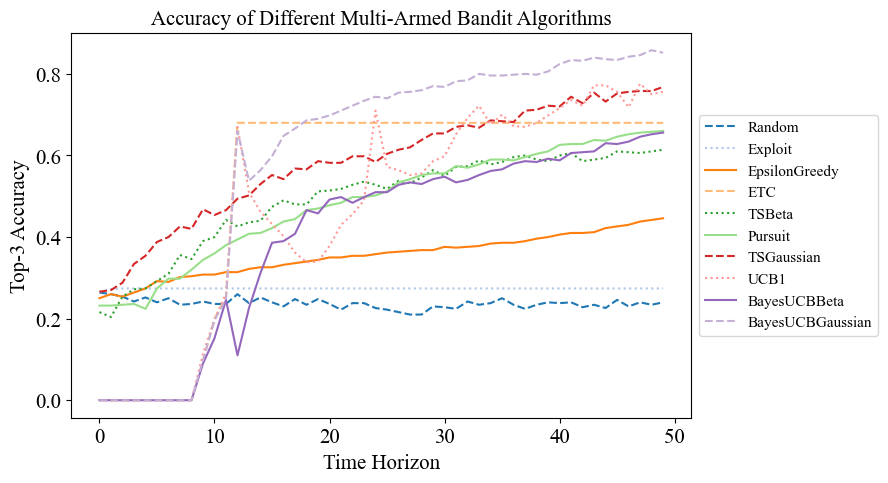

In [2]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))

# plt.rcParams['font.sans-serif'] = ['Arial']
plt.rc('font', family='Times New Roman')

colors = plt.cm.tab20(np.linspace(0, 1, 20)) 
linestyles = ['--',':', '-']
algos=['Random','Exploit','EpsilonGreedy','ETC','TSBeta','Pursuit', 'TSGaussian','UCB1', 'BayesUCBBeta','BayesUCBGaussian' ]

for i in range(len(algos)):
    color = colors[i % len(colors)]
    linestyle = linestyles[i % len(linestyles)]
    plt.plot(cns[i], label=algos[i], color=color, linestyle=linestyle)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time Horizon', fontsize=15)
plt.ylabel('Top-3 Accuracy', fontsize=15)    
plt.title('Accuracy of Different Multi-Armed Bandit Algorithms', fontsize=15)  


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)

plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\Figure 5-b_the.png', 
            format='png', bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()


In [3]:

import pandas as pd
import numpy as np
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['MTBD+tBuXPhos', 'MTBD+tBuBrettPhos', 'MTBD+AdBrettPhos']

random=get_accuracy_bandit_model(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\MAB\Random.csv', best_conditions)
print(random)
BayesUCBGaussian=get_accuracy_bandit_model(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\MAB\BayesUCBGaussian.csv', best_conditions)
print(BayesUCBGaussian)
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1):
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['MTBD+tBuXPhos', 'MTBD+tBuBrettPhos', 'MTBD+AdBrettPhos']

encondings=['mordred','One-hot','CM','EI','Morgan'] 
models=['svm','decision_tree','random_forest','Knn','Gaussian_process']
models=['svm','decision_tree','random_forest']
cns=[]
path=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results'
for model in models:
    for enconding in encondings:
        cn=get_accuracy_bandit_model(path+f'\{model}_history_500_{enconding}.csv', best_conditions)
        print(f'{model}_{enconding}',cn)
        cns.append(cn)


0     0.264
1     0.290
2     0.252
3     0.282
4     0.272
5     0.232
6     0.242
7     0.238
8     0.228
9     0.250
10    0.244
11    0.230
12    0.246
13    0.246
14    0.258
15    0.248
16    0.232
17    0.240
18    0.240
19    0.248
20    0.236
21    0.244
22    0.228
23    0.220
24    0.216
25    0.210
26    0.230
27    0.234
28    0.220
29    0.220
30    0.222
31    0.222
32    0.220
33    0.244
34    0.232
35    0.242
36    0.230
37    0.236
38    0.238
39    0.216
40    0.228
41    0.222
42    0.248
43    0.238
44    0.234
45    0.232
46    0.228
47    0.224
48    0.234
49    0.240
dtype: float64
0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.110
10    0.164
11    0.230
12    0.660
13    0.544
14    0.548
15    0.584
16    0.646
17    0.658
18    0.684
19    0.692
20    0.706
21    0.724
22    0.712
23    0.732
24    0.738
25    0.736
26    0.768
27    0.746
28    0.760
29    0.758
30    0.774
31    0.782
3

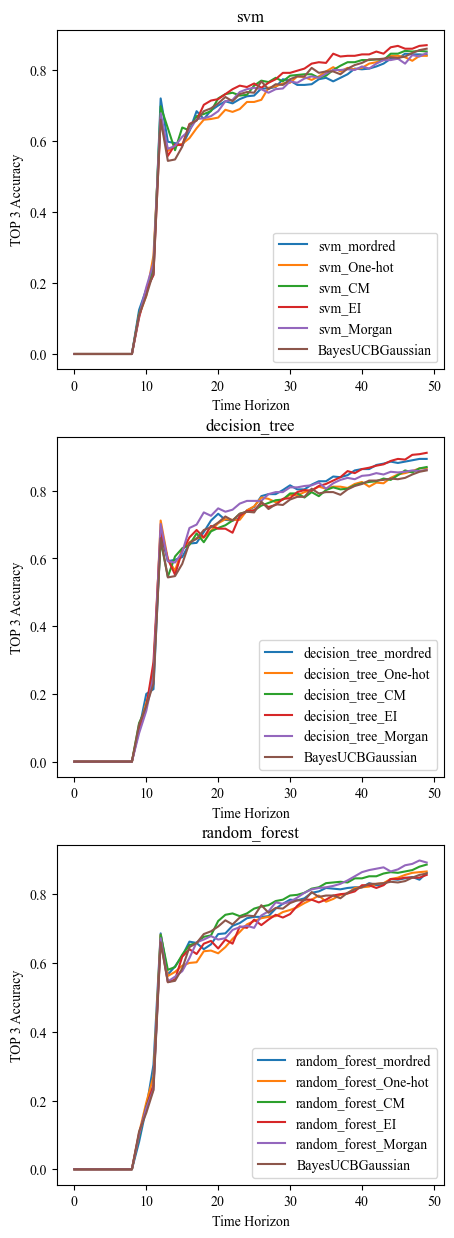

In [4]:
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['Arial']
plt.rc('font', family='Times New Roman')
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt

plt.figure(figsize=(5,15))


for i in range(len(models)):
    plt.subplot(len(models), 1, i+1)
    for j in range(len(encondings)):
        plt.plot(cns[i*len(encondings)+j], label=f'{models[i]}_{encondings[j]}')
    plt.plot(BayesUCBGaussian, label='BayesUCBGaussian')
    plt.legend()
    plt.xlabel('Time Horizon')
    plt.ylabel('TOP 3 Accuracy')
    plt.title(f'{models[i]}')
plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\Figure 5-c_the.png', format='png', bbox_inches='tight', pad_inches=0, dpi=500)

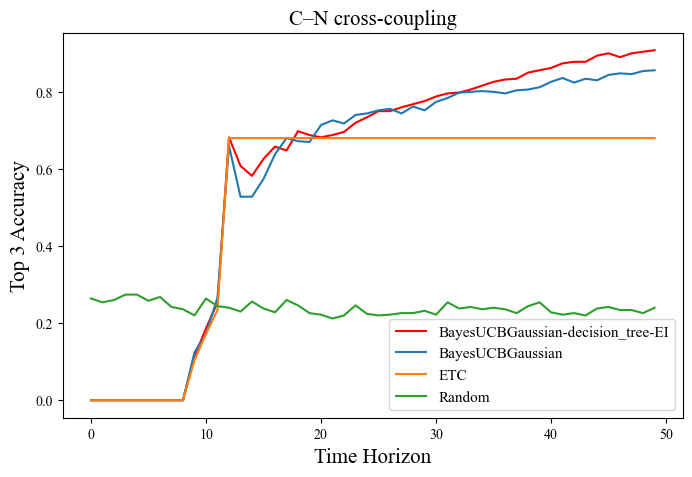

In [6]:
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1):
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['MTBD+tBuXPhos', 'MTBD+tBuBrettPhos', 'MTBD+AdBrettPhos']


fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\decision_tree_history_500_EI.csv'
cn=get_accuracy_bandit_model(fp,best_conditions)
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\MAB\BayesUCBGaussian.csv'
cn_baye=get_accuracy_bandit_model(fp,best_conditions)
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\MAB\ETC.csv'
cn_etc_baseline=get_accuracy_bandit_model(fp,best_conditions)
fp=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\C–N Cross-Coupling\results\MAB\Random.csv'
cn_random=get_accuracy_bandit_model(fp,best_conditions)
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['Arial']
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(8, 5))
plt.rcParams['axes.unicode_minus'] = False

plt.plot(cn, label='BayesUCBGaussian-decision_tree-EI',color='red')
plt.plot(cn_baye, label='BayesUCBGaussian')
plt.plot(cn_etc_baseline,label='ETC')
plt.plot(cn_random, label='Random')

plt.title('C–N cross-coupling', fontsize=15)

plt.xlabel('Time Horizon', fontsize=15)
plt.ylabel('Top 3 Accuracy', fontsize=15)
plt.legend(fontsize=11)

# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
plt.savefig(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Figure\Figure 5-d_the.png',
            format='png', bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()